In [1]:
# basic data presentation libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# label encoder
from sklearn.preprocessing import LabelEncoder

# train-test-split & hyperparameter tuning parameters
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate

# models (ML Algo)
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

# warnings 
import warnings 
warnings.filterwarnings('ignore')

### Read the DataSet

In [2]:
df_lp = pd.read_csv("Indian Liver Patient Dataset.csv")
df_lp.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
# shape of the data
df_lp.shape

(583, 11)

In [4]:
# information about the data set
df_lp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       583 non-null    int64  
 1   Gender    583 non-null    object 
 2   TB        583 non-null    float64
 3   DB        583 non-null    float64
 4   Alkphos   583 non-null    int64  
 5   Sgpt      583 non-null    int64  
 6   Sgot      583 non-null    int64  
 7   TP        583 non-null    float64
 8   ALB       583 non-null    float64
 9   A/G       579 non-null    float64
 10  Selector  583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


**There is total 11 features(columns) in the data set.**

In [5]:
# checking total null values
df_lp.isnull().sum()

Age         0
Gender      0
TB          0
DB          0
Alkphos     0
Sgpt        0
Sgot        0
TP          0
ALB         0
A/G         4
Selector    0
dtype: int64

**A/G** columns having 4 null values, let's see how can we fix it.

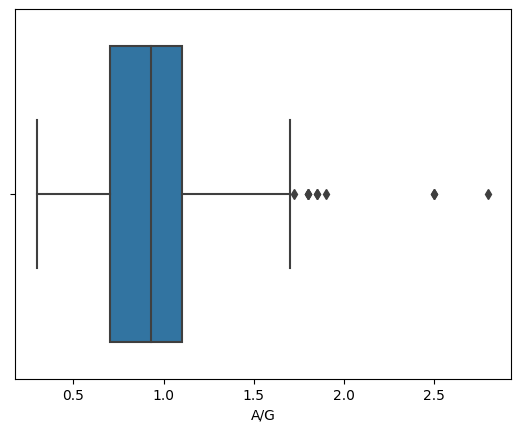

In [6]:
# check the distribution of A/G
sns.boxplot(df_lp['A/G'])
plt.show()

**A/G** columns contain some outliers so, we can replace the missing values with the median.

In [7]:
# replaceing the missing values with median
df_lp['A/G'] = df_lp['A/G'].replace(to_replace = np.NaN, value = df_lp['A/G'].median())
df_lp.isnull().sum()

Age         0
Gender      0
TB          0
DB          0
Alkphos     0
Sgpt        0
Sgot        0
TP          0
ALB         0
A/G         0
Selector    0
dtype: int64

In [8]:
# data description for numerical col
df_lp.describe()

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G,Selector
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.946947,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318495,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [9]:
# data description for categorical col
df_lp.describe(exclude=[np.number])

,Gender
count,583
unique,2
top,Male
freq,441


**Interpretation:**<br>
    **count** for all col are same that means there is no missing value present in the data set.<br>
    Based on the **Age** column we can see 44 is the average patients age. Followed by maximum age 90 and minimum is 4.<br>
    Maximum Patiens are Male.

For further analysis we need to convert **Gender** column as a numerical column.

In [10]:
# apply label encoder on Gender column
le = LabelEncoder()
df_lp['Gender'] = le.fit_transform(df_lp['Gender'])

#check the dtype of Gender column after applying the label encoder
#print(df_lp['Gender'].dtypes)

#print the data set head
df_lp.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G,Selector
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


### Checking Outliers

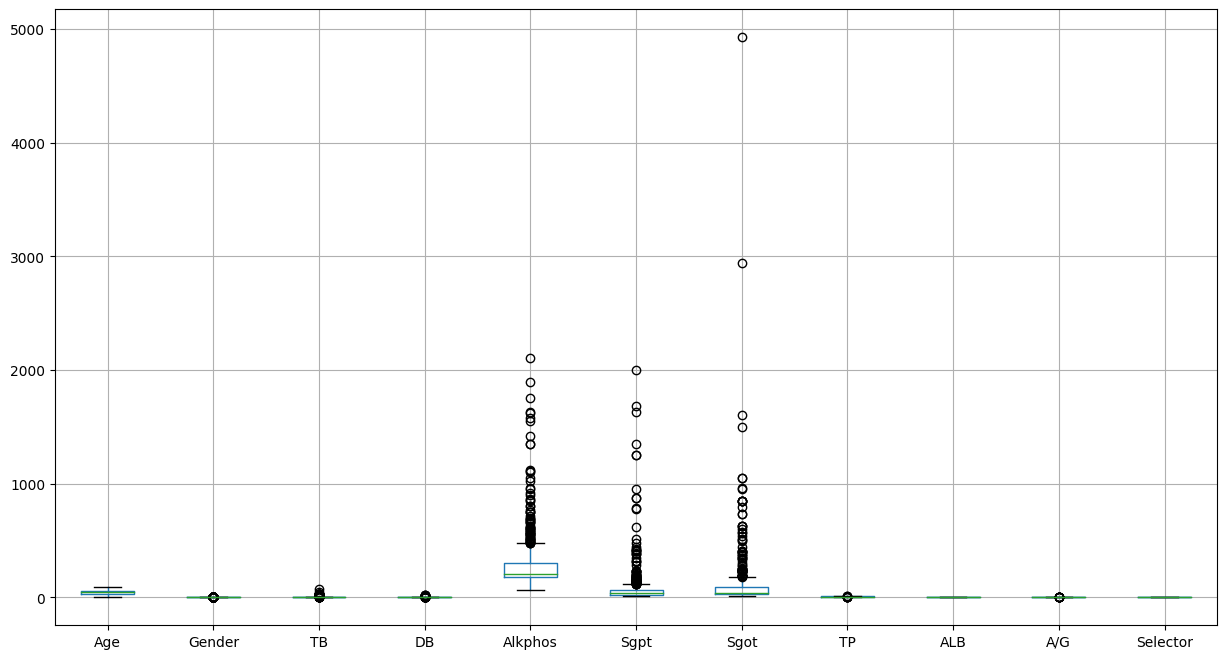

In [11]:
# checking for outliers
plt.figure(figsize =(15, 8))
df_lp.boxplot()
plt.show()

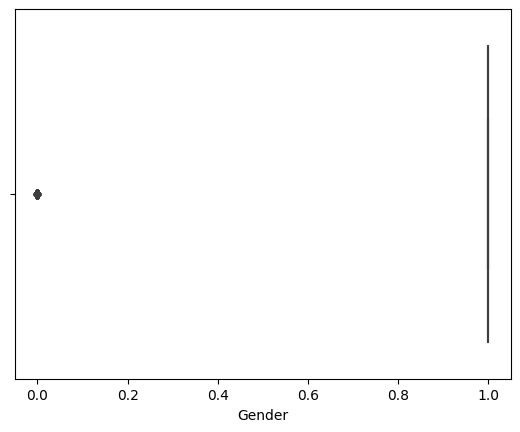

In [12]:
# checking Gender column separately
sns.boxplot(df_lp.Gender)
plt.show()

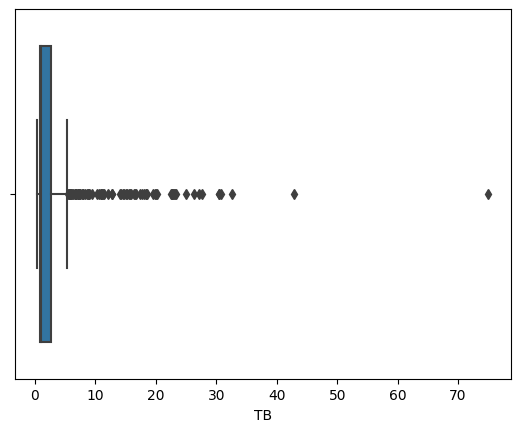

In [13]:
# checking TB column separately
sns.boxplot(df_lp.TB)
plt.show()

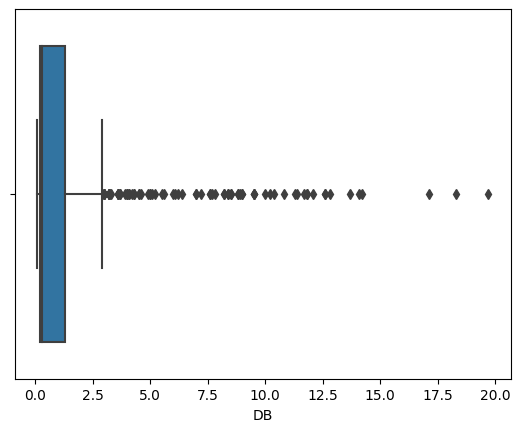

In [14]:
# checking DB column separately
sns.boxplot(df_lp.DB)
plt.show()

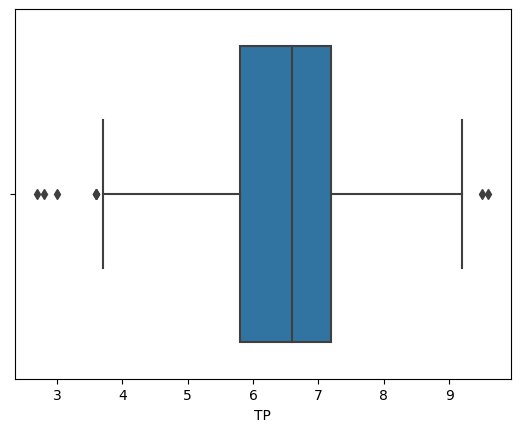

In [15]:
# checking TP column separately
sns.boxplot(df_lp.TP)
plt.show()

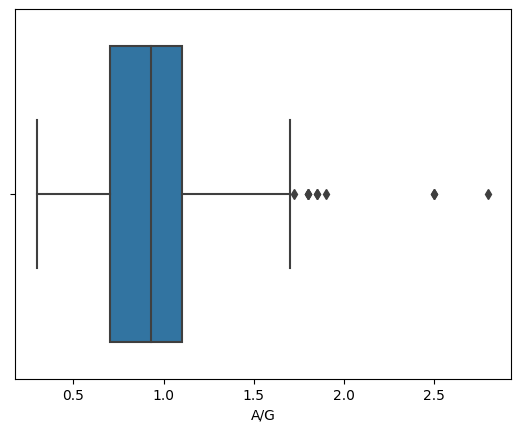

In [16]:
# checking A/G column separately
sns.boxplot(df_lp['A/G'])
plt.show()

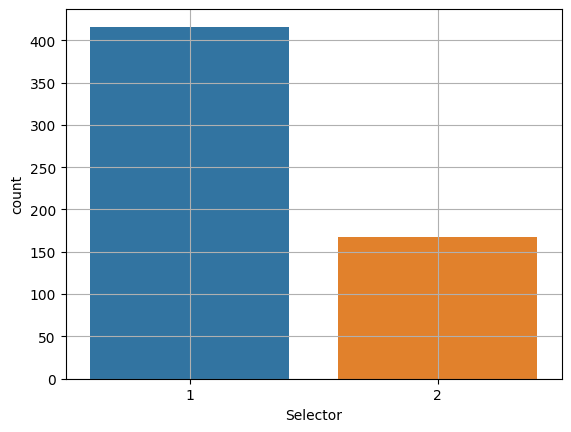

In [17]:
# distribution of target column 
sns.countplot(df_lp['Selector'])
plt.grid(True)
plt.show()

**Interpretation**:<br>
    Most of the column contains outliers and the count of the target column is imbalanced. For further analysis we can't remove this outliers as they are still possible a person indicates he/she has liver problems.

### Correlation Matrix

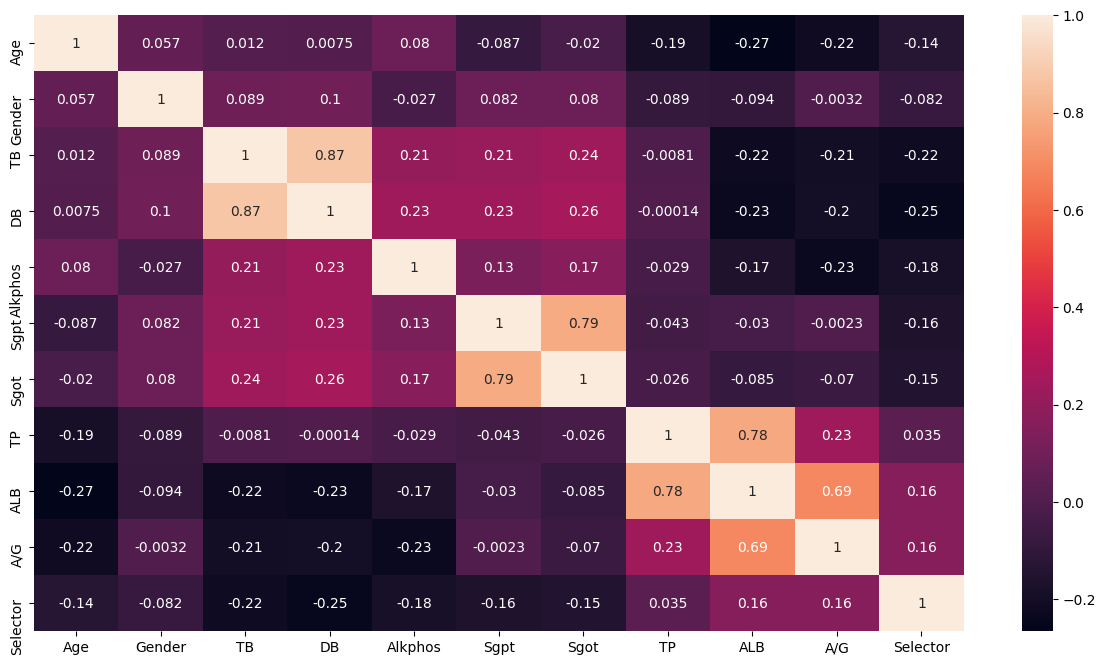

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(df_lp.corr(), annot=True)
plt.show()

### Train-Test-Split

In [22]:
# define X and y
X = df_lp.drop('Selector', axis=1)
y = df_lp['Selector']

# split the data into 70-30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# checking the shape of the train and test data 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(408, 10)
(175, 10)
(408,)
(175,)


### Model Buiding

According to the No Free Lunch Theorem (NFLT) of Machine Learning there is no standard algorithm or no set of rules, that works best in all the datasets. So the best approach is to try multiple Machine Learing Algorithms, if required tune them, and compare them for specific scenario.